<a href="https://colab.research.google.com/github/dharaneeshgunturu2003/Yoga-Pose-Detection/blob/main/Yoga_pose_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [3]:
basedir = "/content/drive/MyDrive/Yoga Poses dataset/DATASET/"
train_path = os.path.join(basedir, 'TRAIN')
test_path = os.path.join(basedir, 'TEST')

In [4]:
img_size = (224, 224)
batch_size = 32

# Data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


In [7]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [8]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

In [9]:
# Compile the model

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [11]:
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [12]:
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator,
                    callbacks=[early_stopping, reduce_lr, model_checkpoint])

Epoch 1/50
 1/34 [..............................] - ETA: 19:43 - loss: 2.5782 - accuracy: 0.2500

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


34/34 [==============================] - ETA: 0s - loss: 2.6970 - accuracy: 0.1924 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


34/34 [==============================] - 878s 26s/step - loss: 2.6970 - accuracy: 0.1924 - val_loss: 2.2000 - val_accuracy: 0.1532 - lr: 9.9653e-04
Epoch 2/50
34/34 [==============================] - 647s 19s/step - loss: 2.4248 - accuracy: 0.2118 - val_loss: 1.7850 - val_accuracy: 0.2468 - lr: 9.9297e-04
Epoch 3/50
34/34 [==============================] - 646s 19s/step - loss: 2.2563 - accuracy: 0.2081 - val_loss: 1.9743 - val_accuracy: 0.2447 - lr: 9.8941e-04
Epoch 4/50
34/34 [==============================] - 651s 19s/step - loss: 2.1328 - accuracy: 0.2183 - val_loss: 1.7943 - val_accuracy: 0.2447 - lr: 9.8588e-04
Epoch 5/50
34/34 [==============================] - 663s 19s/step - loss: 2.0962 - accuracy: 0.2266 - val_loss: 1.7004 - val_accuracy: 0.2553 - lr: 9.8235e-04
Epoch 6/50
34/34 [==============================] - 707s 21s/step - loss: 2.0098 - accuracy: 0.2229 - val_loss: 1.6091 - val_accuracy: 0.2277 - lr: 9.7884e-04
Epoch 7/50
34/34 [==============================] - 649s 

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

15/15 [==============================] - 77s 5s/step - loss: 1.4162 - accuracy: 0.4234
Test accuracy: 0.4234042465686798


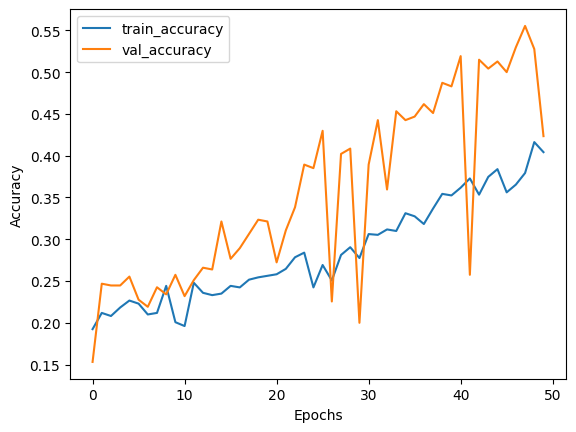

In [14]:
# Plot the training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
def predict_yoga_pose(image_path):
    # Load the image
    image = load_img(image_path, target_size=img_size)

    # Convert the image to an array
    image_array = img_to_array(image)
    image_array = image_array / 255.0  # Rescale the image

    # Expand the dimensions of the image array
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions
    predictions = model.predict(image_array)

    # Decode the predictions to get the class label
    predicted_class = np.argmax(predictions, axis=-1)
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class[0]]

    return predicted_label

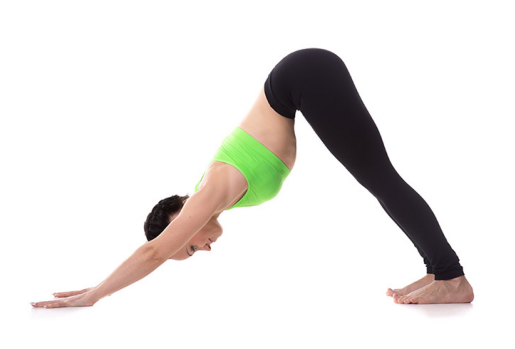

1/1 [==============================] - 0s 348ms/step


'downdog'

In [29]:
from PIL import Image
img_path = '/content/drive/MyDrive/Yoga Poses dataset/DATASET/TEST/downdog/00000022.jpg'
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()
predict_yoga_pose(img_path)